In [306]:
import networkx as nx
from community import community_louvain as cm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyvis.network import Network

In [307]:
p1 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD1_NET.csv", index_col=0)
p2 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD2_NET.csv", index_col=0)
p3 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD3_NET.csv", index_col=0)
p4_5 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD4_5_NET.csv", index_col=0)
p6 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD6_NET.csv", index_col=0)

G1 = nx.from_pandas_adjacency(p1)
G2 = nx.from_pandas_adjacency(p2)
G3 = nx.from_pandas_adjacency(p3)
G4_5 = nx.from_pandas_adjacency(p4_5)
G6 = nx.from_pandas_adjacency(p6)

G = [G1, G2, G3, G4_5, G6]

In [308]:
# giant components
G1_giant = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])
G2_giant = G2.subgraph(sorted(nx.connected_components(G2), key=len, reverse=True)[0])
G3_giant = G3.subgraph(sorted(nx.connected_components(G3), key=len, reverse=True)[0])
G4_5_giant = G4_5.subgraph(sorted(nx.connected_components(G4_5), key=len, reverse=True)[0])
G6_giant = G6.subgraph(sorted(nx.connected_components(G6), key=len, reverse=True)[0])

G_giant = [G1_giant, G2_giant, G3_giant, G4_5_giant, G6_giant]

In [309]:
print('Period 1: ' + nx.info(G1))
print('Period 2: ' + nx.info(G2))
print('Period 3: ' + nx.info(G3))
print('Period 4_5: ' + nx.info(G4_5))
print('Period 6: ' + nx.info(G6))

Period 1: Name: 
Type: Graph
Number of nodes: 334
Number of edges: 405
Average degree:   2.4251
Period 2: Name: 
Type: Graph
Number of nodes: 260
Number of edges: 340
Average degree:   2.6154
Period 3: Name: 
Type: Graph
Number of nodes: 526
Number of edges: 1025
Average degree:   3.8973
Period 4_5: Name: 
Type: Graph
Number of nodes: 367
Number of edges: 514
Average degree:   2.8011
Period 6: Name: 
Type: Graph
Number of nodes: 83
Number of edges: 92
Average degree:   2.2169


In [310]:
# pyvis
# nt = Network("500px", "500px")
# populates the nodes and edges data structures
# nt.from_nx(G1)
# nt.show("nx.html")

In [311]:
df = pd.DataFrame(['G1', 'G2', 'G3', 'G4_5', 'G6'], columns=['graph'])

# Number of nodes

<AxesSubplot:xlabel='graph', ylabel='number_of_nodes'>

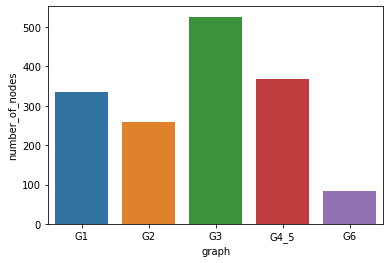

In [312]:
number_of_nodes = []
for i in G:
    number_of_nodes.append(nx.number_of_nodes(i))

df['number_of_nodes'] = number_of_nodes
sns.barplot(data = df, x = 'graph', y = 'number_of_nodes')

# Number of edges

<AxesSubplot:xlabel='graph', ylabel='number_of_edges'>

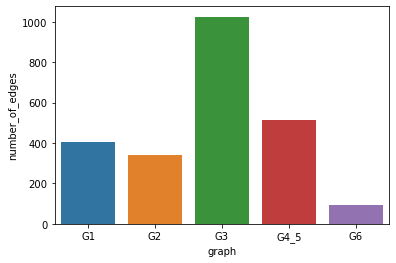

In [313]:
number_of_edges = []
for i in G:
    number_of_edges.append(nx.number_of_edges(i))

df['number_of_edges'] = number_of_edges
sns.barplot(data = df, x = 'graph', y = 'number_of_edges')

# Clustering coefficient

<AxesSubplot:xlabel='graph', ylabel='average_clustering'>

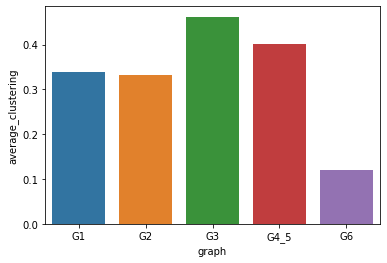

In [314]:
average_clustering = []
for i in G:
    average_clustering.append(nx.average_clustering(i))

df['average_clustering'] = average_clustering
sns.barplot(data = df, x = 'graph', y = 'average_clustering')

# Average shortest path

<AxesSubplot:xlabel='graph', ylabel='average_shortest_path_length'>

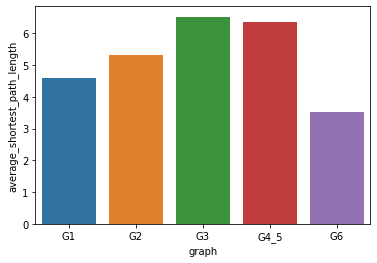

In [315]:
average_shortest_path_length = []
for i in G_giant:
    average_shortest_path_length.append(nx.average_shortest_path_length(i))

df['average_shortest_path_length'] = average_shortest_path_length
sns.barplot(data = df, x = 'graph', y = 'average_shortest_path_length')

# Modularity

<AxesSubplot:xlabel='graph', ylabel='modularity'>

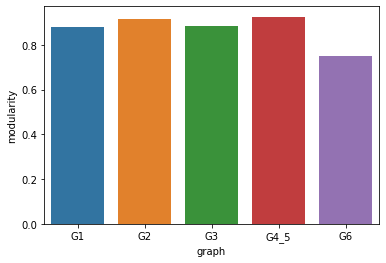

In [316]:
best_partition = []
modularity = []
for i in G:
    part = cm.best_partition(i)
    best_partition.append(part)
    mod = cm.modularity(part,i)
    modularity.append(mod)
    
df['best_partition'] = best_partition
df['modularity'] = modularity
sns.barplot(data = df, x = 'graph', y = 'modularity')

# Density

<AxesSubplot:xlabel='graph', ylabel='density'>

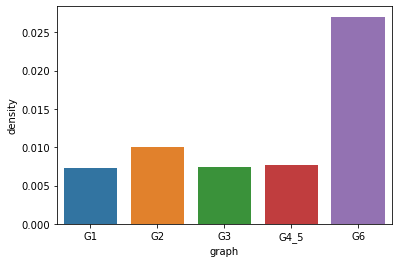

In [317]:
density = []
for i in G:
    density.append(nx.density(i))

df['density'] = density
sns.barplot(data = df, x = 'graph', y = 'density')

# Diameter

<AxesSubplot:xlabel='graph', ylabel='diameter'>

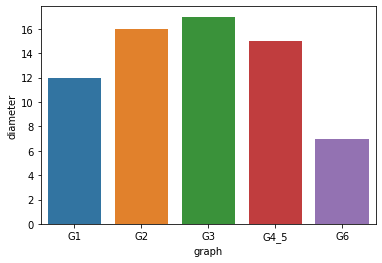

In [318]:
diameter = []
for i in G_giant:
    diameter.append(nx.diameter(i))

df['diameter'] = diameter
sns.barplot(data = df, x = 'graph', y = 'diameter')

# Efficiency

### The efficiency of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. 

<AxesSubplot:xlabel='graph', ylabel='global_efficiency'>

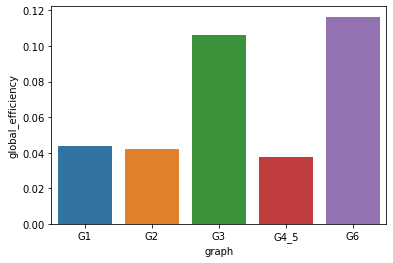

In [319]:
global_efficiency = []
for i in G:
    global_efficiency.append(nx.global_efficiency(i))

df['global_efficiency'] = global_efficiency
sns.barplot(data = df, x = 'graph', y = 'global_efficiency')

# Average degree

<AxesSubplot:xlabel='graph', ylabel='average_degree'>

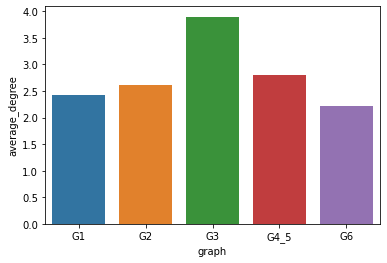

In [320]:
average_degree = []
for i in G:
    average_degree.append(sum([d for (n, d) in nx.degree(i)]) / float(i.number_of_nodes()))

df['average_degree'] = average_degree
sns.barplot(data = df, x = 'graph', y = 'average_degree')

# Degree Assortativity

<AxesSubplot:xlabel='graph', ylabel='degree_assortativity_coefficient'>

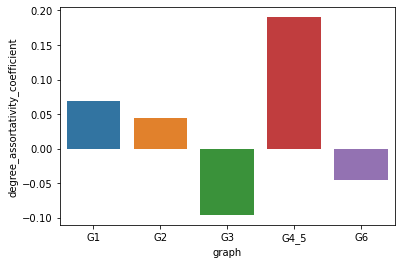

In [321]:
degree_assortativity_coefficient = []
for i in G:
    degree_assortativity_coefficient.append(nx.degree_assortativity_coefficient(i))

df['degree_assortativity_coefficient'] = degree_assortativity_coefficient
sns.barplot(data = df, x = 'graph', y = 'degree_assortativity_coefficient')

# Rich Club Coefficient
## Not sure what's going on here...

In [324]:
rich_club_coefficient = []
for i in G:
    rich_club_coefficient.append(nx.rich_club_coefficient(i))

df['rich_club_coefficient'] = rich_club_coefficient
sns.barplot(data = df, x = 'graph', y = 'rich_club_coefficient')

ZeroDivisionError: float division by zero

# Small-World Coefficient (sigma)
## WARNING: TAKES AGES TO RUN, DO NOT RUN THIS AGAIN!!
### Apparently this is a poor measure as it is heavily dependant on network size.

<AxesSubplot:xlabel='graph', ylabel='sigma'>

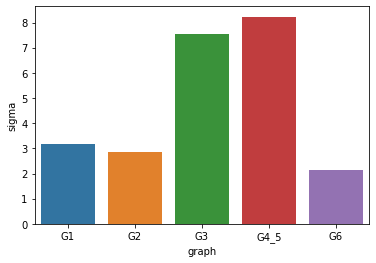

In [326]:
#sigma = []
#for i in G_giant:
#    sigma.append(nx.sigma(i))
#
#df['sigma'] = sigma
#sns.barplot(data = df, x = 'graph', y = 'sigma')

# Small-World Coefficient (omega)
## WARNING: TAKES AGES TO RUN, DO NOT RUN THIS AGAIN!!

<AxesSubplot:xlabel='graph', ylabel='omega'>

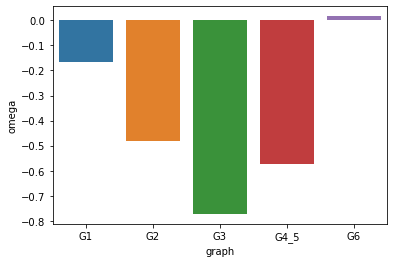

In [328]:
#omega = []
#for i in G_giant:
#    omega.append(nx.omega(i))
#
#df['omega'] = omega
#sns.barplot(data = df, x = 'graph', y = 'omega')

# Degree distribution 

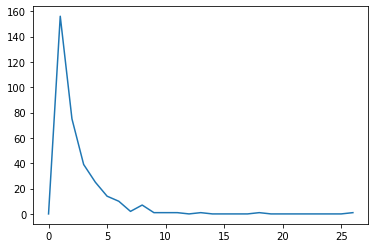

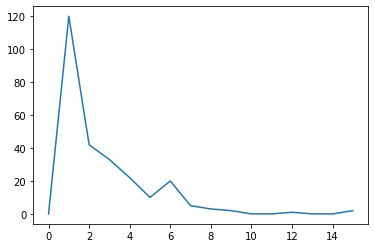

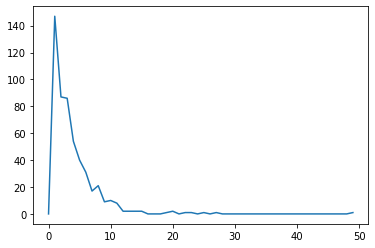

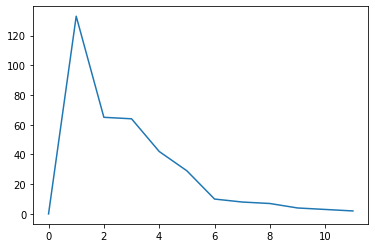

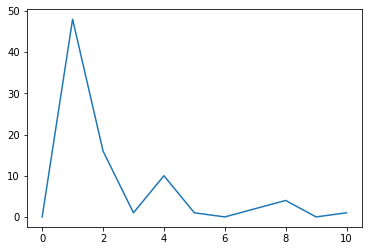

In [17]:
degree_distribution = []
for i in G:
    degree_distribution.append(nx.degree_histogram(i))

df['degree_distribution'] = degree_distribution

for i in df['degree_distribution']:
    plt.figure()
    plt.plot(i)

# Node Attributes

In [295]:
q1 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD1_ATTT.csv").rename(columns = {'Unnamed: 0':'node'})
q2 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD2_ATT.csv").rename(columns = {'Unnamed: 0':'node'})
q3 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD3_ATT.csv").rename(columns = {'Unnamed: 0':'node'})
q4_5 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD4_5_ATT.csv").rename(columns = {'Unnamed: 0':'node'})
q6 = pd.read_csv("../data/raw/PIRA Gill CSV/CSV/60_PERIOD6_ATT.csv").rename(columns = {'Unnamed: 0':'node'})

In [296]:
atts = [q1, q2, q3, q4_5, q6]

In [297]:
def drop_prefix(self, prefix):
    self.columns = self.columns.str.lstrip(prefix)
    return self

pd.core.frame.DataFrame.drop_prefix = drop_prefix

for index, df in enumerate(atts):
    if index + 1 == 4:
        df.drop_prefix('Period4-5')
    elif index + 1 == 5:
        df.drop_prefix('Period6')
    else:
        df.drop_prefix('Period' + str(index + 1))

In [298]:
for period, value in enumerate(atts):
    atts[period]['period'] = '4_5' if period == 3 else '6' if period == 4 else str(period + 1)

In [299]:
from functools import reduce
node_attributes_from_file = reduce(lambda left, right: pd.merge(left, right, how='outer'), atts)

In [300]:
node_attributes = pd.DataFrame()

for period, graph in enumerate(G):
    new_attributes = pd.DataFrame()
    
    new_attributes['node'] = list(nx.nodes(graph))
    new_attributes['period'] = '4_5' if period == 3 else '6' if period == 4 else str(period + 1)
    new_attributes['degree'] = [j for i, j in list(nx.degree(graph))]
    new_attributes['degree_centrality'] = [j for i, j in list(nx.degree_centrality(graph))]
    new_attributes['eigenvector_centrality'] = [j for i, j in list(nx.eigenvector_centrality(graph))]
    new_attributes['closeness_centrality'] = [j for i, j in list(nx.closeness_centrality(graph))]
    new_attributes['betweenness_centrality'] = [j for i, j in list(nx.betweenness_centrality(graph))]
    new_attributes['communicability_betweenness_centrality'] = [j for i, j in list(nx.communicability_betweenness_centrality(graph))]
    new_attributes['single_source_shortest_path'] = [j for i, j in list(nx.single_source_shortest_path(graph))]
    new_attributes['neighbours'] = [list(nx.neighbors(graph, i)) for i in new_attributes['node']]
    
    node_attributes = node_attributes.append(new_attributes, ignore_index=True, sort=False)

In [301]:
node_attributes = pd.merge(node_attributes_from_file, node_attributes, how = 'inner', on = ['node', 'period'])

# Data Set ready for input into predictive model 

In [302]:
node_attributes

,node,Gender,University,Marital Status,Age at Recruitment,Antrim Brigade,Derry Brigade,Armagh Brigade,Down Brigade,Tyrone Brigade,...,Senior,Gun,IED_C,IED_P,ForOp,Rob,period,Fermanagh Brigade,degree,neighbours
0,ZF1013,0,0,1,30,0,0,0,0,0,...,0,0,0,0,0,1,1,NaN,4,"[ZF1135, ZF119, ZF1304, ZF629]"
1,ZF1014,0,0,1,20,1,0,0,0,0,...,0,0,0,1,0,0,1,NaN,5,"[ZF260, ZF459, ZF659, ZF769, ZF952]"
2,ZF1015,1,0,99999,99999,1,0,0,0,0,...,0,0,0,0,0,0,1,NaN,2,"[ZF1177, ZF237]"
3,ZF1020,0,0,0,31,0,1,0,0,0,...,0,0,0,0,0,0,1,NaN,2,"[ZF197, ZF721]"
4,ZF1025,0,0,99999,19,0,1,0,0,0,...,0,0,0,1,0,0,1,NaN,1,[ZF535]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,ZF898,0,0,99999,25,0,0,0,0,0,...,0,1,0,0,0,0,6,0.0,1,[ZF948]
1566,ZF945,1,0,1,40,0,0,0,0,0,...,0,0,0,0,0,0,6,0.0,1,[ZF111]
1567,ZF948,0,0,1,25,0,0,0,0,0,...,0,0,0,1,0,0,6,0.0,4,"[ZF1283, ZF234, ZF294, ZF898]"
1568,ZF97,0,0,99999,26,0,0,0,0,0,...,0,0,0,1,1,0,6,0.0,1,[ZF268]
